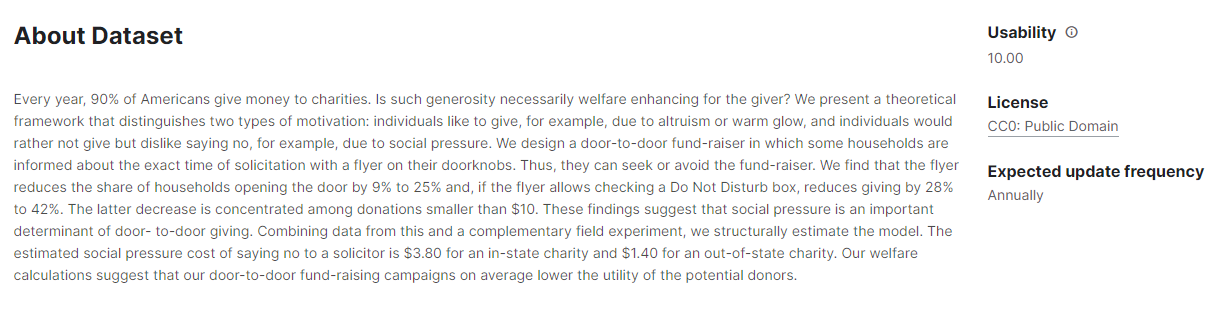

# import

In [1]:
import numpy as np
import pandas as pd
 
train = pd.read_csv('../input/finding-donors-for-charityml/census.csv')
test = pd.read_csv('../input/finding-donors-for-charityml/test_census.csv')

# pandas_profiling

In [2]:
from pandas_profiling import ProfileReport

profile_census = ProfileReport(train, title="census Pandas Profiling Report")
profile_test_census = ProfileReport(test, title="test_census Pandas Profiling Report")

In [3]:
profile_census

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile_test_census

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# null Val in test_census
test.isna().sum()

Unnamed: 0          0
age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

In [6]:
print(train.info())
print('===========================')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns

# data preprocessing

In [7]:
train_ = train.drop('income',axis=1) 
train_f = train[['income']]
del test['Unnamed: 0']

In [8]:
print(train_.columns.shape)
print(test.columns.shape)

(13,)
(13,)


# Missing Data

In [9]:
from sklearn.impute import SimpleImputer

def missing_data(df):
    d_num = df.select_dtypes(['int64','float64'])
    d_cat = df.select_dtypes(['object'])
    
    # num data dtype ['int64' , 'float64']
    imputer_number_data = SimpleImputer(strategy='median')
    d = imputer_number_data.fit_transform(d_num)
    data_num = pd.DataFrame(d , columns=d_num.columns)
    
    # cat data dtype 'object' 
    imputer_cat_data = SimpleImputer(strategy="most_frequent")
    d2 = imputer_cat_data.fit_transform(d_cat)
    data_obj = pd.DataFrame(d2,columns=d_cat.columns)
    
    return data_num , data_obj
    
    pass

train_num ,train_obj = missing_data(train_)
test_num , test_obj = missing_data(test)

# NUM_DATA StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

def scaler(data):
    num_scaler=StandardScaler()
    scaler = num_scaler.fit_transform(data)
    data = pd.DataFrame(scaler,columns=data.columns,index=data.index)
    return data

train_num = scaler(train_num)
test_num = scaler(test_num)

In [11]:
col = list(train_obj.columns)
for i in col:
    print(i)
    print(train_obj[i].unique(),'\n\n')

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] 


education_level
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] 


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv'] 


relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


sex
[' Male' ' Female'] 


native-country
[' United-States' ' Cuba' ' Jamaica' ' India' 

# OBJ_DATA OneHotEncoder || OrdinalEncoder

In [12]:
# ordinal data ['workclass', 'education_level', 'marital-status', 'relationship']
from sklearn.preprocessing import OrdinalEncoder

ordinal_data = ['workclass', 'education_level', 'marital-status', 'relationship']


ordinal_encoder = OrdinalEncoder(categories = [ [' State-gov' ,' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc' ,' Without-pay'],
                                                [' Bachelors', ' HS-grad' ,' 11th', ' Masters' ,' 9th' ,' Some-college',' Assoc-acdm' ,' 7th-8th' ,' Doctorate' ,' Assoc-voc', ' Prof-school',' 5th-6th', ' 10th' ,' Preschool', ' 12th' ,' 1st-4th'],
                                                [' Never-married' ,' Married-civ-spouse' ,' Divorced',' Married-spouse-absent', ' Separated' ,' Married-AF-spouse' ,' Widowed'],
                                                [' Not-in-family' ,' Husband', ' Wife', ' Own-child' ,' Unmarried',' Other-relative']])
cat_encoded_train = ordinal_encoder.fit_transform(train_obj[ordinal_data])
train_obj_ord = pd.DataFrame(cat_encoded_train,columns=ordinal_data)

cat_encoded_test = ordinal_encoder.fit_transform(test_obj[ordinal_data])
test_obj_ord = pd.DataFrame(cat_encoded_test,columns=ordinal_data)
###############################################
###############################################
# nominal data ['occupation', 'race', 'sex', 'native-country'] 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


def nominal_data(train_obj,i):
    x = cat_encoder.fit_transform(train_obj[[i]])
    qw = [f'{i}{r}' for r in range(len(train_obj[i].unique()))]
    df = pd.DataFrame(x.toarray(),dtype=np.float64,columns=qw)
    return df

occupation = nominal_data(train_obj,'occupation')
race = nominal_data(train_obj,'race')
sex = nominal_data(train_obj,'sex')
native_country = nominal_data(train_obj,'native-country')

toccupation = nominal_data(test_obj,'occupation')
trace = nominal_data(test_obj,'race')
tsex = nominal_data(test_obj,'sex')
tnative_country = nominal_data(test_obj,'native-country')

In [13]:
ordinal_data = ['workclass', 'education_level', 'marital-status', 'relationship']


from sklearn.preprocessing import StandardScaler

def scaler(data):
    num_scaler=StandardScaler()
    scaler = num_scaler.fit_transform(data)
    data = pd.DataFrame(scaler,columns=data.columns,index=data.index)
    return data

train_ordinal_data_scaler = scaler(train_obj_ord)
test_ordinal_data_scaler = scaler(test_obj_ord) 

In [14]:
ordinal_encoder = OrdinalEncoder(categories =[['<=50K', '>50K']])
train_f = ordinal_encoder.fit_transform(train_f)
train_f = pd.DataFrame(train_f,columns=['income'])

In [15]:
train_data_ = pd.concat([train_num,train_ordinal_data_scaler,occupation, race, sex, native_country] , axis=1)
test_data_ = pd.concat([test_num,test_ordinal_data_scaler,toccupation, trace, tsex, tnative_country] , axis=1)
y = train_f.income

# data splitting

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_, y, test_size=0.30, random_state=42)

# Select Model

In [17]:
from sklearn.metrics import accuracy_score,r2_score,classification_report

from xgboost import XGBClassifier

In [18]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
ypred = XGB.predict(X_test)
print(XGB," : ",accuracy_score(y_test,ypred)*100)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)  :  87.24847055354905


# XGBClassifier = 87.2

# classification_report

In [19]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     10193
         1.0       0.79      0.67      0.72      3374

    accuracy                           0.87     13567
   macro avg       0.84      0.80      0.82     13567
weighted avg       0.87      0.87      0.87     13567



# Submission

In [20]:
ypred = XGB.predict(test_data_)
df = pd.DataFrame(ypred,columns=['income'])
sol=pd.read_csv('../input/finding-donors-for-charityml/example_submission.csv')
sol['income']=df['income']
sol.to_csv('./submission.csv',index=False)

In [21]:
pd.read_csv('./submission.csv')

id  income
0          0       0
1          1       1
2          2       0
3          3       1
4          4       0
...      ...     ...
45217  45217       0
45218  45218       0
45219  45219       0
45220  45220       1
45221  45221       0

[45222 rows x 2 columns]

# Notes 😃😃😃😃
* Thank for reading my analysis and my classification. 😃😃😃😃

* If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

* If anyone has a model with a higher percentage, please tell me 🤝🤝🤝, it`s will support me .

# Vote ❤️😃
## If you liked my work upvote me ,

# The End 🤝🎉🤝🎉